# Clustering for Heart Disease

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

c:\Anaconda\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Anaconda\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\Eya Kaabachi\AppData\Local\Temp\ipykernel_7064\851023996.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `impo

In [3]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,ADDEPEV2,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,4,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,2,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,4,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,2,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,0.0


* CVDINFR4: you had a heart attack, also called a myocardial infarction? 
* CVDCRHD4: you had angina or coronary heart disease? 
* CVDSTRK3: you had a stroke ?
* _MICHD:  have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

The code calculates the correlation between each feature in the DataFrame and the features specified in the 'target' list using the `corrwith()` function. This function computes the pairwise correlation between each feature and the target features.

The resulting correlation values are then sorted in descending order using the `sort_values()` function with the `ascending=False` parameter, so that the features with higher absolute correlation values appear at the top of the sorted list.

The variable 'k' represents the number of top features you want to select. In this case, it is set to 20.

Finally, the code selects the top 'k' features based on the sorted correlation values by slicing the 'sorted_features' list using the `[:k]` notation. The `index.tolist()` method is used to extract the feature names as a list.

The resulting 'selected_features' list contains the names of the top 'k' features that have the highest absolute correlation with the target features.

In [3]:
import pandas as pd


# 'target' is a list of multiple features
target = ['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']
# Calculate correlation between target and individual features
correlation = df.corrwith(df[target])

# Sort features based on correlation values
sorted_features = correlation.abs().sort_values(ascending=False)

# Select the top-k features based on correlation
k = 20  # Number of features to select
selected_features = sorted_features[:k].index.tolist()
selected_features

['CVDCRHD4',
 '_MICHD',
 'CVDSTRK3',
 'CVDINFR4',
 'ALCDAY5',
 'AVEDRNK2',
 'BEANDAY_',
 'BLOODCHO',
 'BPHIGH4',
 'BPMEDS',
 'CHCSCNCR',
 'CHOLCHK',
 'DIABETE3',
 'DRNKANY5',
 'DROCDY3_',
 'EDUCA',
 'EXERANY2',
 'EXERHMM1',
 'EXERHMM2',
 'EXEROFT1']

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from itertools import combinations

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# 'target' is a list of multiple features

# Initialize a machine learning algorithm (e.g., Linear Regression)
model = LinearRegression()

# Perform cross-validation and evaluate the performance for different feature subsets
best_score = 0.0
best_features = []
target = ['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']
# Loop through different feature combinations


In [4]:
for k in range(1, len(df.columns)):
    # Generate all possible feature combinations of size k
    feature_combinations = combinations(df.columns, k)

    # Iterate through each combination
    for features in feature_combinations:
        # Convert features to a list
        feature_list = list(features)

        # Train and evaluate the model using cross-validation
        scores = cross_val_score(model, df[feature_list], df[target], cv=5)

        # Calculate the average score
        avg_score = scores.mean()

        # Check if the current combination performs better
        if avg_score > best_score:
            best_score = avg_score
            best_features = feature_list

# The best_features list will contain the selected features with the highest performance

KeyboardInterrupt: 

In [ ]:
print(best_features)

In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('CVDCRHD4', axis=1)
y = df['CVDCRHD4']


In [4]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

KeyboardInterrupt: 

In [ ]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

In [5]:
!pip install yellowbrick

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=42),
                 k=(1, 11))

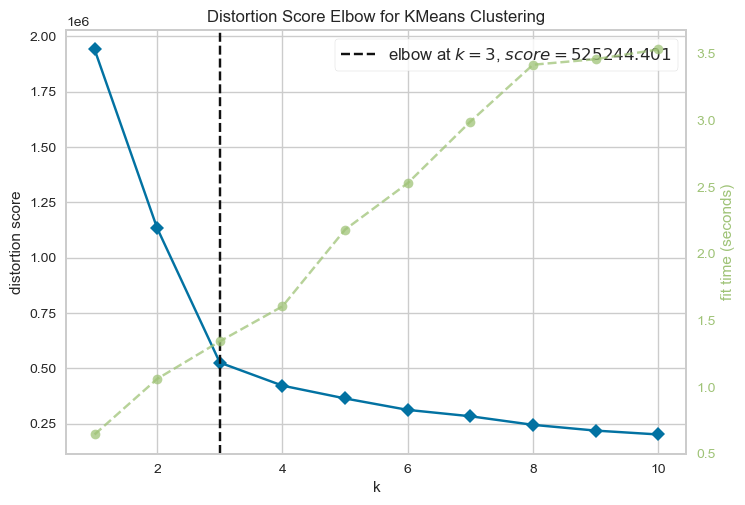

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

features = ['CVDCRHD4',
 '_MICHD',
 'CVDSTRK3',
 'CVDINFR4',
 'ALCDAY5',
 'AVEDRNK2',
 'BEANDAY_',
 'BLOODCHO',
 'BPHIGH4',
 'BPMEDS',
 'CHCSCNCR',
 'CHOLCHK',
 'DIABETE3',
 'DRNKANY5',
 'DROCDY3_',
 'EDUCA',
 'EXERANY2',
 'EXERHMM1',
 'EXERHMM2',
 'EXEROFT1']
#features = ['SEX', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1', 'BPHIGH4',
 #      'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDCRHD4', 'CVDSTRK3',
  #     '_MICHD', 'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3','CVDINFR4',
   #    '_SMOKER3', '_RFSMOK3']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

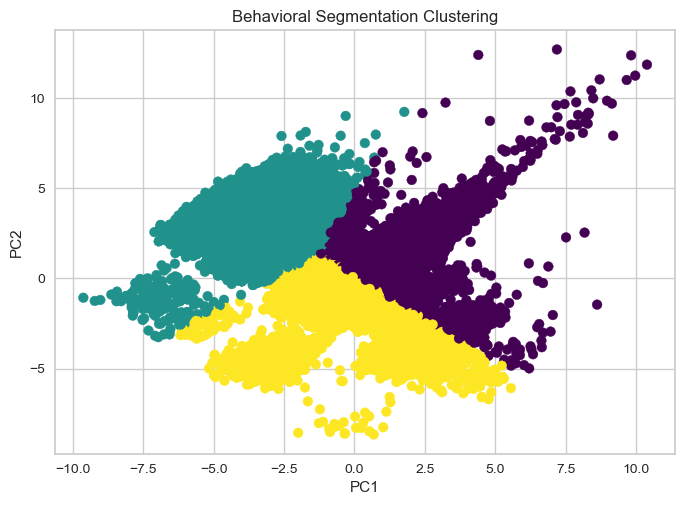

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmodel = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmodel, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [ ]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

for i in range(kmeans.n_clusters):
    cluster = clustered_data.loc[clustered_data['cluster'] == i]
    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
    profile.to_file(f"Heart_clustering_{i}_profile.html")

Cluster Sizes:
Cluster 0: 210286
Cluster 1: 193760
Cluster 2: 37410

Cluster Means:
         CVDCRHD4    _MICHD  CVDSTRK3  CVDINFR4     ALCDAY5  AVEDRNK2  \
cluster                                                                 
0        1.998640  1.997342  1.974977  2.037073   11.489557  1.041077   
1        1.999510  1.996573  1.992625  2.007984  171.652864  2.124086   
2        1.334162  1.000000  1.843678  1.341754   60.995563  1.298316   

          BEANDAY_  BLOODCHO   BPHIGH4    BPMEDS  CHCSCNCR   CHOLCHK  \
cluster                                                                
0        23.850689  1.282896  2.119228  1.066666  1.917831  1.251229   
1        27.421227  1.221589  2.413641  1.065586  1.907509  1.408232   
2        24.611815  1.078134  1.489495  1.056295  1.824218  1.111735   

         DIABETE3  DRNKANY5   DROCDY3_     EDUCA  EXERANY2   EXERHMM1  \
cluster                                                                 
0        2.675043  1.910722  87.790048  4.6

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
target = ['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']
cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop(daf[target], axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy: 0.8607235083586282


In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmodel)
kmeans_calinski = calinski_harabasz_score(daf, kmodel)
kmeans_davies = davies_bouldin_score(daf, kmodel)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  42656.92537914977
KMeans - Davies-Bouldin Index:  2.034382444725976


### Disease risk prediction:

In [6]:
# Split data into features (X) and target variable (y)
X = daf.drop(['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD'], axis=1)
y = daf[['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']]


# Add the cluster labels as a new column to the DataFrame
#cluster_labels = kmeans.labels_
#daf['cluster'] = cluster_labels


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_list, y_test_list = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of y_train_list:", y_train_list.shape)
print("Shape of y_test_list:", y_test_list.shape)

Shape of y_train_list: (353164, 4)
Shape of y_test_list: (88292, 4)


In [8]:
from catboost import CatBoostClassifier
# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,\
          'l2_leaf_reg': 3, 'iterations': 100}
  

In [9]:
from sklearn.metrics import precision_score, recall_score

# Initialize and train separate logistic regression models for each target feature
models = []
for i in range(y_train_list.shape[1]):
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train_list.iloc[:, i])
    models.append(model)

# Predict disease risk for new data for each target feature
y_pred_list = [model.predict(X_test) for model in models]

# Evaluate the performance of the models for each target feature
accuracies = [model.score(X_test, y_test_list.iloc[:, i]) for i, model in enumerate(models)]
precisions = [precision_score(y_test_list.iloc[:, i], y_pred_list[i], average='macro', zero_division=0) for i in range(len(y_test_list.columns))]
recalls = [recall_score(y_test_list.iloc[:, i], y_pred_list[i], average='macro', zero_division=0) for i in range(len(y_test_list.columns))]

# Print the evaluation metrics for each target feature
for i in range(len(y_train_list.columns)):
    print(f"Metrics for Target Feature {i+1}:")
    print("Accuracy:", accuracies[i])
    print("Precision:", precisions[i])
    print("Recall:", recalls[i])
    print()

0:	learn: 0.9413844	total: 187ms	remaining: 18.5s
1:	learn: 0.8239055	total: 234ms	remaining: 11.5s
2:	learn: 0.7319910	total: 279ms	remaining: 9.03s
3:	learn: 0.6579246	total: 322ms	remaining: 7.72s
4:	learn: 0.5972426	total: 364ms	remaining: 6.92s
5:	learn: 0.5464340	total: 411ms	remaining: 6.44s
6:	learn: 0.5039922	total: 452ms	remaining: 6s
7:	learn: 0.4677263	total: 497ms	remaining: 5.72s
8:	learn: 0.4368480	total: 539ms	remaining: 5.45s
9:	learn: 0.4103353	total: 582ms	remaining: 5.24s
10:	learn: 0.3872129	total: 628ms	remaining: 5.08s
11:	learn: 0.3672606	total: 676ms	remaining: 4.96s
12:	learn: 0.3497277	total: 717ms	remaining: 4.8s
13:	learn: 0.3345409	total: 758ms	remaining: 4.66s
14:	learn: 0.3212809	total: 804ms	remaining: 4.55s
15:	learn: 0.3095921	total: 845ms	remaining: 4.44s
16:	learn: 0.2996759	total: 885ms	remaining: 4.32s
17:	learn: 0.2906119	total: 940ms	remaining: 4.28s
18:	learn: 0.2827220	total: 989ms	remaining: 4.21s
19:	learn: 0.2757876	total: 1.04s	remaining: 

0:	learn: 0.6177511	total: 16.2ms	remaining: 1.6s
1:	learn: 0.5563547	total: 32.1ms	remaining: 1.57s
2:	learn: 0.5053382	total: 46.5ms	remaining: 1.5s
3:	learn: 0.4624037	total: 64.8ms	remaining: 1.55s
4:	learn: 0.4260079	total: 81.6ms	remaining: 1.55s
5:	learn: 0.3948618	total: 97ms	remaining: 1.52s
6:	learn: 0.3683497	total: 112ms	remaining: 1.49s
7:	learn: 0.3456162	total: 127ms	remaining: 1.47s
8:	learn: 0.3258699	total: 144ms	remaining: 1.45s
9:	learn: 0.3087758	total: 163ms	remaining: 1.47s
10:	learn: 0.2941165	total: 179ms	remaining: 1.45s
11:	learn: 0.2815681	total: 194ms	remaining: 1.43s
12:	learn: 0.2701900	total: 211ms	remaining: 1.41s
13:	learn: 0.2603762	total: 227ms	remaining: 1.4s
14:	learn: 0.2521326	total: 239ms	remaining: 1.35s
15:	learn: 0.2445711	total: 258ms	remaining: 1.35s
16:	learn: 0.2379944	total: 278ms	remaining: 1.36s
17:	learn: 0.2322862	total: 299ms	remaining: 1.36s
18:	learn: 0.2274770	total: 314ms	remaining: 1.34s
19:	learn: 0.2230443	total: 331ms	remain

0:	learn: 0.9323812	total: 43.9ms	remaining: 4.35s
1:	learn: 0.8084544	total: 119ms	remaining: 5.83s
2:	learn: 0.7117424	total: 167ms	remaining: 5.4s
3:	learn: 0.6338328	total: 214ms	remaining: 5.13s
4:	learn: 0.5698498	total: 261ms	remaining: 4.97s
5:	learn: 0.5166203	total: 312ms	remaining: 4.89s
6:	learn: 0.4716543	total: 363ms	remaining: 4.82s
7:	learn: 0.4334057	total: 408ms	remaining: 4.69s
8:	learn: 0.4007167	total: 450ms	remaining: 4.55s
9:	learn: 0.3724606	total: 495ms	remaining: 4.46s
10:	learn: 0.3480422	total: 547ms	remaining: 4.43s
11:	learn: 0.3268491	total: 596ms	remaining: 4.37s
12:	learn: 0.3084897	total: 646ms	remaining: 4.32s
13:	learn: 0.2924721	total: 693ms	remaining: 4.26s
14:	learn: 0.2784169	total: 734ms	remaining: 4.16s
15:	learn: 0.2659296	total: 784ms	remaining: 4.12s
16:	learn: 0.2549576	total: 835ms	remaining: 4.08s
17:	learn: 0.2453682	total: 882ms	remaining: 4.02s
18:	learn: 0.2369070	total: 933ms	remaining: 3.98s
19:	learn: 0.2296580	total: 980ms	remaini

0:	learn: 0.6265067	total: 17.1ms	remaining: 1.69s
1:	learn: 0.5721401	total: 35.5ms	remaining: 1.74s
2:	learn: 0.5272175	total: 55.1ms	remaining: 1.78s
3:	learn: 0.4894785	total: 74.7ms	remaining: 1.79s
4:	learn: 0.4575009	total: 96ms	remaining: 1.82s
5:	learn: 0.4302176	total: 114ms	remaining: 1.79s
6:	learn: 0.4070398	total: 141ms	remaining: 1.87s
7:	learn: 0.3873518	total: 182ms	remaining: 2.1s
8:	learn: 0.3701550	total: 207ms	remaining: 2.09s
9:	learn: 0.3554213	total: 232ms	remaining: 2.09s
10:	learn: 0.3427365	total: 254ms	remaining: 2.06s
11:	learn: 0.3317903	total: 279ms	remaining: 2.04s
12:	learn: 0.3221200	total: 299ms	remaining: 2s
13:	learn: 0.3138221	total: 316ms	remaining: 1.94s
14:	learn: 0.3066295	total: 333ms	remaining: 1.88s
15:	learn: 0.3006272	total: 348ms	remaining: 1.82s
16:	learn: 0.2952740	total: 366ms	remaining: 1.79s
17:	learn: 0.2905974	total: 383ms	remaining: 1.75s
18:	learn: 0.2866797	total: 401ms	remaining: 1.71s
19:	learn: 0.2830907	total: 418ms	remainin

Metrics for Target Feature 1:
Accuracy: 0.9386580890680922
Precision: 0.3128860296893641
Recall: 0.3333333333333333

Metrics for Target Feature 2:
Accuracy: 0.9436981833008653
Precision: 0.47184909165043265
Recall: 0.5

Metrics for Target Feature 3:
Accuracy: 0.955511258098129
Precision: 0.3185037526993763
Recall: 0.3333333333333333

Metrics for Target Feature 4:
Accuracy: 0.9132990531418476
Precision: 0.4566495265709238
Recall: 0.5



we use logistic regression as the predictive model to calculate the risk scores. We select a subset of features and the target variable (CVDINFR4 in this case) for risk prediction. The data is preprocessed, split into training and testing sets, and a logistic regression model is trained on the training data. The model is then used to predict the risk scores for all data points, and the average predicted risk score is calculated for each cluster. Finally, the predicted risk scores for each cluster are printed.

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train separate logistic regression models for each target feature
cat_models = {}
predicted_risk_scores = {}
cluster_labels = kmeans.labels_
daf['cluster'] = cluster_labels
for feature in y.columns:
    cat = CatBoostClassifier(**params)
    cat.fit(X_train, y_train[feature])
    cat_models[feature] = cat
    predicted_risk_scores[feature] = cat.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each target feature using the same cluster labels
for feature in y.columns:
    daf[f'PredictedRisk_{feature}'] = predicted_risk_scores[feature]

# Calculate the average predicted risk score for each cluster and each target feature
average_risk_scores = {}

for feature in y.columns:
    average_risk_scores[feature] = {}
    for cluster in set(cluster_labels):
        cluster_indices = cluster_labels == cluster
        average_risk_scores[feature][cluster] = predicted_risk_scores[feature][cluster_indices].mean()

# Print the predicted risk scores for each cluster and each target feature
for feature in y.columns:
    for cluster, prediction in average_risk_scores[feature].items():
        print(f"Cluster {cluster}: Predicted risk of {feature} - {prediction:.4f}")

0:	learn: 0.9413844	total: 58.3ms	remaining: 5.77s
1:	learn: 0.8239055	total: 115ms	remaining: 5.64s
2:	learn: 0.7319910	total: 168ms	remaining: 5.42s
3:	learn: 0.6579246	total: 216ms	remaining: 5.18s
4:	learn: 0.5972426	total: 264ms	remaining: 5.01s
5:	learn: 0.5464340	total: 317ms	remaining: 4.96s
6:	learn: 0.5039922	total: 355ms	remaining: 4.72s
7:	learn: 0.4677263	total: 405ms	remaining: 4.65s
8:	learn: 0.4368480	total: 453ms	remaining: 4.58s
9:	learn: 0.4103353	total: 495ms	remaining: 4.46s
10:	learn: 0.3872129	total: 540ms	remaining: 4.37s
11:	learn: 0.3672606	total: 583ms	remaining: 4.28s
12:	learn: 0.3497277	total: 628ms	remaining: 4.2s
13:	learn: 0.3345409	total: 675ms	remaining: 4.15s
14:	learn: 0.3212809	total: 734ms	remaining: 4.16s
15:	learn: 0.3095921	total: 789ms	remaining: 4.14s
16:	learn: 0.2996759	total: 837ms	remaining: 4.09s
17:	learn: 0.2906119	total: 894ms	remaining: 4.07s
18:	learn: 0.2827220	total: 945ms	remaining: 4.03s
19:	learn: 0.2757876	total: 990ms	remaini

0:	learn: 0.6177511	total: 39.3ms	remaining: 3.89s
1:	learn: 0.5563547	total: 59.4ms	remaining: 2.91s
2:	learn: 0.5053382	total: 74ms	remaining: 2.39s
3:	learn: 0.4624037	total: 89.7ms	remaining: 2.15s
4:	learn: 0.4260079	total: 105ms	remaining: 2s
5:	learn: 0.3948618	total: 120ms	remaining: 1.88s
6:	learn: 0.3683497	total: 137ms	remaining: 1.82s
7:	learn: 0.3456162	total: 153ms	remaining: 1.76s
8:	learn: 0.3258699	total: 170ms	remaining: 1.71s
9:	learn: 0.3087758	total: 189ms	remaining: 1.7s
10:	learn: 0.2941165	total: 206ms	remaining: 1.67s
11:	learn: 0.2815681	total: 225ms	remaining: 1.65s
12:	learn: 0.2701900	total: 247ms	remaining: 1.65s
13:	learn: 0.2603762	total: 266ms	remaining: 1.64s
14:	learn: 0.2521326	total: 281ms	remaining: 1.59s
15:	learn: 0.2445711	total: 301ms	remaining: 1.58s
16:	learn: 0.2379944	total: 324ms	remaining: 1.58s
17:	learn: 0.2322862	total: 346ms	remaining: 1.57s
18:	learn: 0.2274770	total: 365ms	remaining: 1.55s
19:	learn: 0.2230443	total: 381ms	remaining

0:	learn: 0.9323812	total: 43.8ms	remaining: 4.33s
1:	learn: 0.8084544	total: 86.7ms	remaining: 4.25s
2:	learn: 0.7117424	total: 128ms	remaining: 4.13s
3:	learn: 0.6338328	total: 172ms	remaining: 4.13s
4:	learn: 0.5698498	total: 217ms	remaining: 4.13s
5:	learn: 0.5166203	total: 261ms	remaining: 4.08s
6:	learn: 0.4716543	total: 313ms	remaining: 4.15s
7:	learn: 0.4334057	total: 359ms	remaining: 4.12s
8:	learn: 0.4007167	total: 400ms	remaining: 4.04s
9:	learn: 0.3724606	total: 447ms	remaining: 4.03s
10:	learn: 0.3480422	total: 503ms	remaining: 4.07s
11:	learn: 0.3268491	total: 555ms	remaining: 4.07s
12:	learn: 0.3084897	total: 601ms	remaining: 4.02s
13:	learn: 0.2924721	total: 645ms	remaining: 3.96s
14:	learn: 0.2784169	total: 682ms	remaining: 3.86s
15:	learn: 0.2659296	total: 732ms	remaining: 3.84s
16:	learn: 0.2549576	total: 785ms	remaining: 3.83s
17:	learn: 0.2453682	total: 830ms	remaining: 3.78s
18:	learn: 0.2369070	total: 873ms	remaining: 3.72s
19:	learn: 0.2296580	total: 915ms	remai

0:	learn: 0.6265067	total: 17.2ms	remaining: 1.71s
1:	learn: 0.5721401	total: 34.1ms	remaining: 1.67s
2:	learn: 0.5272175	total: 51.7ms	remaining: 1.67s
3:	learn: 0.4894785	total: 68.3ms	remaining: 1.64s
4:	learn: 0.4575009	total: 88.4ms	remaining: 1.68s
5:	learn: 0.4302176	total: 104ms	remaining: 1.63s
6:	learn: 0.4070398	total: 120ms	remaining: 1.6s
7:	learn: 0.3873518	total: 136ms	remaining: 1.56s
8:	learn: 0.3701550	total: 155ms	remaining: 1.57s
9:	learn: 0.3554213	total: 172ms	remaining: 1.55s
10:	learn: 0.3427365	total: 189ms	remaining: 1.53s
11:	learn: 0.3317903	total: 205ms	remaining: 1.5s
12:	learn: 0.3221200	total: 224ms	remaining: 1.5s
13:	learn: 0.3138221	total: 242ms	remaining: 1.49s
14:	learn: 0.3066295	total: 280ms	remaining: 1.58s
15:	learn: 0.3006272	total: 303ms	remaining: 1.59s
16:	learn: 0.2952740	total: 323ms	remaining: 1.57s
17:	learn: 0.2905974	total: 340ms	remaining: 1.55s
18:	learn: 0.2866797	total: 357ms	remaining: 1.52s
19:	learn: 0.2830907	total: 373ms	remai

Cluster 0: Predicted risk of CVDINFR4 - 0.9233
Cluster 1: Predicted risk of CVDINFR4 - 0.9635
Cluster 2: Predicted risk of CVDINFR4 - 0.8821
Cluster 0: Predicted risk of CVDCRHD4 - 0.9320
Cluster 1: Predicted risk of CVDCRHD4 - 0.9644
Cluster 2: Predicted risk of CVDCRHD4 - 0.8876
Cluster 0: Predicted risk of CVDSTRK3 - 0.9442
Cluster 1: Predicted risk of CVDSTRK3 - 0.9762
Cluster 2: Predicted risk of CVDSTRK3 - 0.9198
Cluster 0: Predicted risk of _MICHD - 0.8948
Cluster 1: Predicted risk of _MICHD - 0.9466
Cluster 2: Predicted risk of _MICHD - 0.8333


In [138]:
# Randomly choose new individuals from the dataset
num_new_individuals = 3  # Specify the desired number of new individuals
new_individuals = daf.sample(n=num_new_individuals, replace=True)

# Generate random numbers for each column based on the dataset column values
for column in new_individuals.columns:
    if column != 'cluster':  # Skip the 'cluster' column
        unique_values = daf[column].unique()
        new_individuals[column] = np.random.choice(unique_values, size=num_new_individuals)
new_individuals.drop(['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD'],axis=1,inplace=True)
# Print the generated new individuals
print(new_individuals)

# Predict the health outcomes for new individuals
predicted_outcomes = model.predict(new_individuals)
predicted_outcomes= predicted_outcomes.flatten().tolist()
# Assign the new individuals to clusters based on their predicted health outcomes
new_individuals['cluster'] = predicted_outcomes

# Print the generated new individuals and their assigned clusters
print(new_individuals)

        ALCDAY5  AVEDRNK2  BEANDAY_  BLOODCHO  BPHIGH4  BPMEDS  CHCSCNCR  \
35327     207.0      24.0      33.0         2      3.0     2.0       1.0   
100976    213.0      21.0     120.0         1      2.0     2.0       1.0   
368629    206.0       5.0     143.0         2      2.0     1.0       1.0   

        CHOLCHK  DIABETE3  DRNKANY5  DROCDY3_  EDUCA  EXERANY2  EXERHMM1  \
35327       2.0       3.0         1        50      1       2.0     215.0   
100976      2.0       4.0         7        97      4       2.0     215.0   
368629      1.0       1.0         7        67      1       1.0      58.0   

        EXERHMM2  EXEROFT1  
35327      830.0     104.0  
100976     400.0     262.0  
368629     924.0     218.0  
        ALCDAY5  AVEDRNK2  BEANDAY_  BLOODCHO  BPHIGH4  BPMEDS  CHCSCNCR  \
35327     207.0      24.0      33.0         2      3.0     2.0       1.0   
100976    213.0      21.0     120.0         1      2.0     2.0       1.0   
368629    206.0       5.0     143.0         2 

In [ ]:
# Define the personalized doctor recommendations for each segment
recommendations = {
    1: "Congratulations, the patient is healthy.",
    2: "Quit smoking, limit alcohol consumption and try to stay healthy to avoid getting diabetes.",
    3: "Patient is at risk! Please visit a specialist!",
}


# Provide personalized doctor recommendations for each new individual
for segment in predicted_outcomes:
    if segment in recommendations:
        recommendation = recommendations[segment]
        print("Recommendation for patient {}: {}".format(segment, recommendation))
    else:
        print("No specific recommendation available for patient {}".format(segment))

In [ ]:
doc_df=pd.read_csv("healthcare_docs.csv")
doc_df.rename(columns={'CredentialType': 'Specialty'},inplace=True)
doc_df['FullName'] = doc_df['LastName'].str.cat(doc_df['FirstName'], sep=' ')
doc_df.drop(["LastName","FirstName"],axis=1,inplace=True)
filtered_doc_df = doc_df.copy()  # Create a copy of the DataFrame to avoid modifying the original data

# Iterate over the DataFrame and drop rows containing "Nurse" or "Pharmacy" in the "Specialty" column
for index, row in doc_df.iterrows():
    if ("Nurse" in row['Specialty']) or ("Pharmacy" in row['Specialty']) or ("Nursing" in row['Specialty']) or ("Dental" in row['Specialty']):
        filtered_doc_df.drop(index, inplace=True)

# Reset the index of the filtered DataFrame
filtered_doc_df.reset_index(drop=True, inplace=True)

doc_df = filtered_doc_df
doc_df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

specialties = doc_df['Specialty'].fillna('').astype(str).tolist()  # Convert to list of strings

# Compute TF-IDF scores for the specialties
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(specialties)

# Convert predicted_outcomes to a list of strings
predicted_outcomes = [str(outcome) for outcome in predicted_outcomes]

# Compute the TF-IDF vector for each patient's predicted disease or risk category
patient_tfidf = tfidf_vectorizer.transform(predicted_outcomes)

# Calculate cosine similarity between each patient's TF-IDF vector and all doctors' TF-IDF vectors
similarity_scores = cosine_similarity(patient_tfidf, tfidf_matrix)

# Retrieve top N doctors based on similarity scores for each patient
top_n = 10 # Number of recommendations to retrieve

# Print the recommended doctors for each patient, only if there is a predicted risk
print("Recommended Doctors:")
for i in range(len(new_individuals)):
    patient = new_individuals.iloc[i]
    if predicted_outcomes[i] == "3.0":  # Check if there is a predicted risk
        patient_similarity_scores = similarity_scores[i]
        top_indices = patient_similarity_scores.argsort()[-top_n:][::-1]  # Indices of top recommendations

        print(f"Recommendations for Patient {i+1}:")
        for index in top_indices:
            doctor = doc_df.iloc[index]
            if "medical" in doctor['Specialty'].lower() or "physical" in doctor['Specialty'].lower() or "physician" in doctor['Specialty'].lower():
                print(f"- {doctor['FullName']}, Specialty: {doctor['Specialty']}")
    else:
        print(f"No recommendations for Patient {i+1} as there is no predicted risk.")
    print()